In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load datasets
movies = pd.read_csv("/content/drive/MyDrive/Data Science Bootcamp/Project/Data/Data/tmdb_5000_movies.csv")
credits = pd.read_csv("/content/drive/MyDrive/Data Science Bootcamp/Project/Data/Data/tmdb_5000_credits.csv")

# Convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['release_year'] = movies['release_date'].dt.year

# Parse crew to extract director
if isinstance(credits['crew'].iloc[0], str):
    credits['crew'] = credits['crew'].apply(ast.literal_eval)

def extract_director(crew):
    if isinstance(crew, list):
        for member in crew:
            if member.get('job') == 'Director':
                return member.get('name')
    return None

credits['director'] = credits['crew'].apply(extract_director)

# Merge datasets
movies = movies.merge(credits[['movie_id', 'director']], left_on='id', right_on='movie_id', how='left')


# Movies Released Per Year

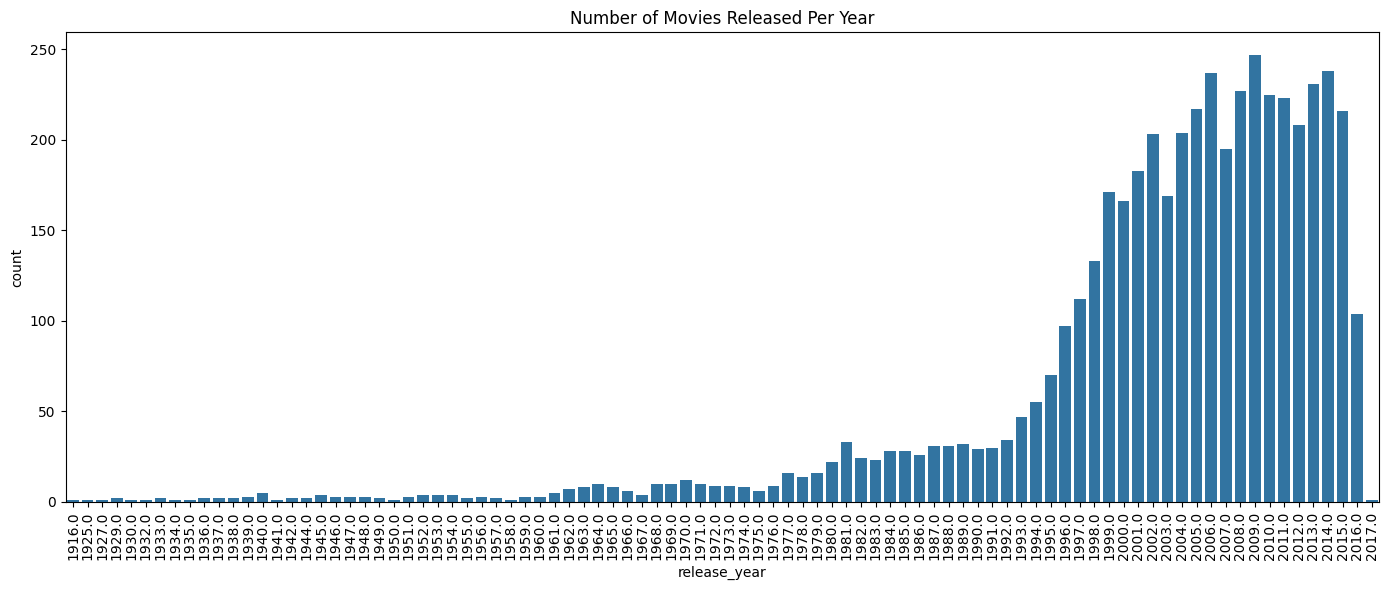

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x='release_year', data=movies, order=movies['release_year'].value_counts().sort_index().index)
plt.title("Number of Movies Released Per Year")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Top 10 Genres by Count (Bar Plot)

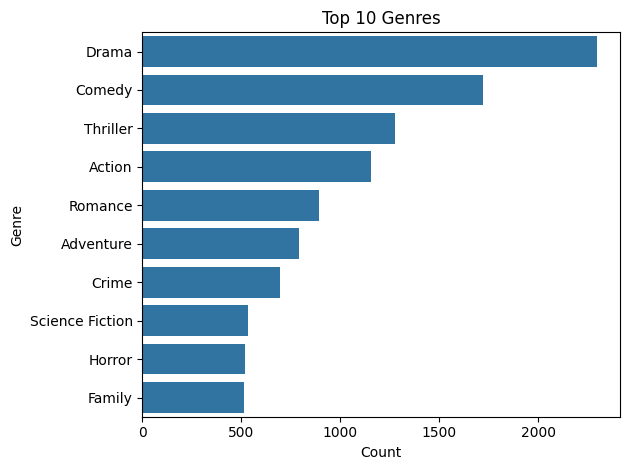

In [ ]:
movies['genres'] = movies['genres'].apply(ast.literal_eval)
movies['genre_list'] = movies['genres'].apply(lambda x: [d['name'] for d in x])
from collections import Counter
genre_counter = Counter([genre for sublist in movies['genre_list'] for genre in sublist])
top_genres = pd.DataFrame(genre_counter.most_common(10), columns=['Genre', 'Count'])

sns.barplot(x='Count', y='Genre', data=top_genres)
plt.title("Top 10 Genres")
plt.tight_layout()
plt.show()


# Genre Distribution (Pie Chart)

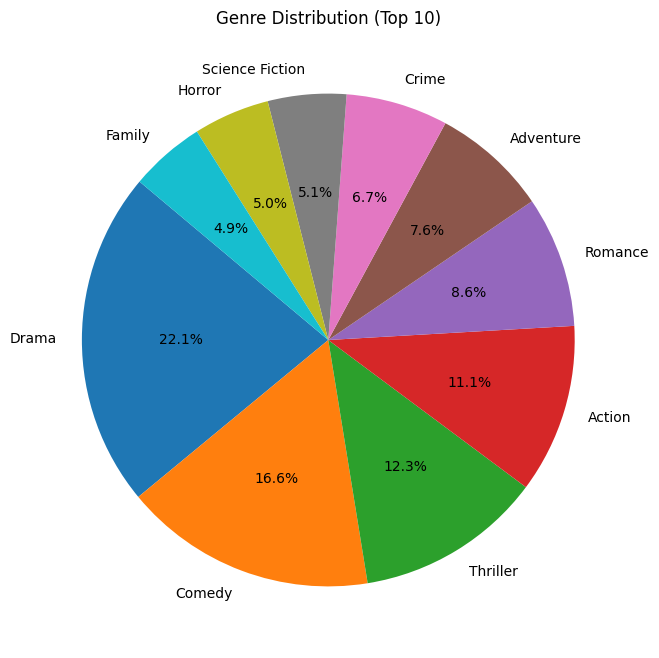

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title("Genre Distribution (Top 10)")
plt.show()


# Top 10 Directors by Avg Rating (Post-1980)

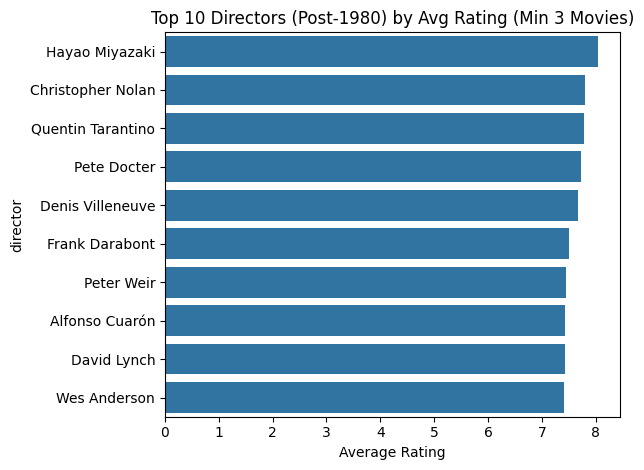

In [ ]:
modern_movies = movies[movies['release_year'] >= 1980]
director_stats = modern_movies.groupby('director').agg({'vote_average': ['mean', 'count'], 'vote_count': 'sum'})
director_stats.columns = ['avg_rating', 'movie_count', 'total_votes']
director_stats = director_stats[director_stats['movie_count'] >= 3]
top_directors = director_stats.sort_values(by=['avg_rating', 'total_votes'], ascending=False).head(10)

sns.barplot(x=top_directors['avg_rating'], y=top_directors.index)
plt.title("Top 10 Directors (Post-1980) by Avg Rating (Min 3 Movies)")
plt.xlabel("Average Rating")
plt.tight_layout()
plt.show()


# Top 10 Movies by Revenue

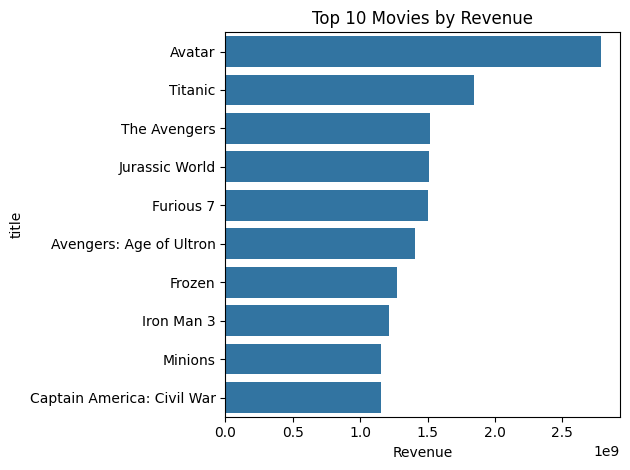

In [ ]:
top_revenue = movies[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
sns.barplot(x='revenue', y='title', data=top_revenue)
plt.title("Top 10 Movies by Revenue")
plt.xlabel("Revenue")
plt.tight_layout()
plt.show()


# Budget vs Revenue (Scatter Plot)

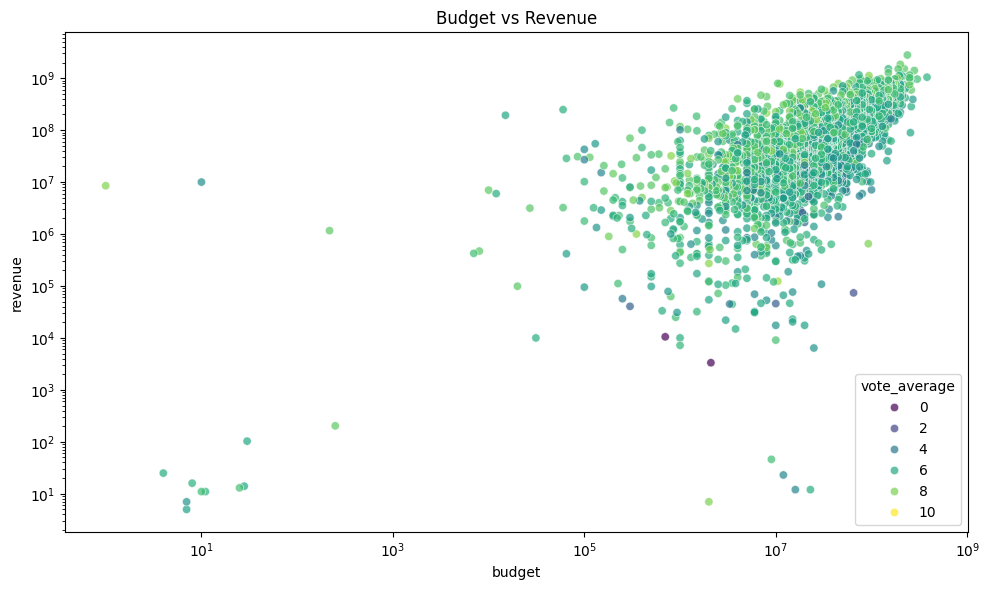

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=movies, x='budget', y='revenue', hue='vote_average', palette='viridis', alpha=0.7)
plt.title("Budget vs Revenue")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()


# Correlation Heatmap (Numeric Features)

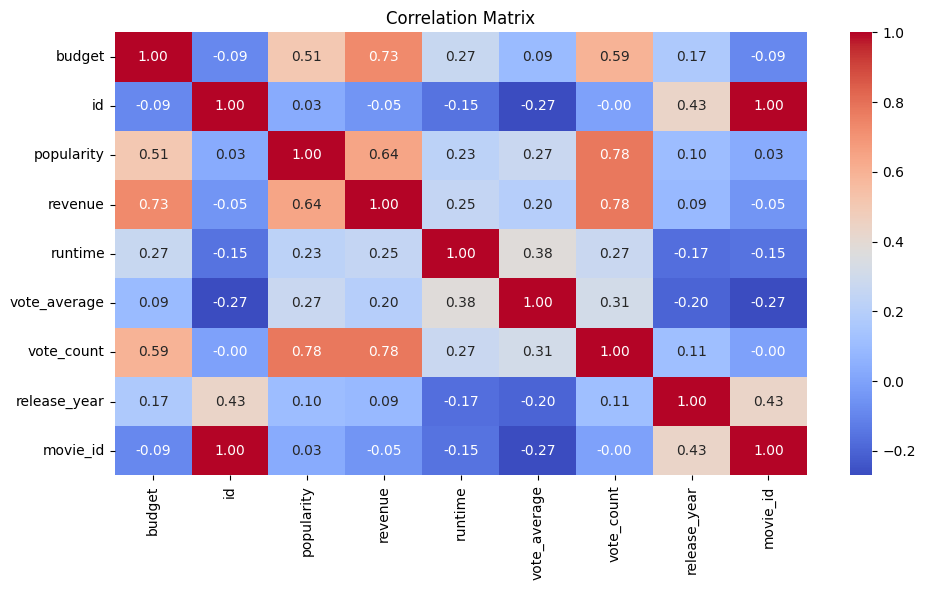

In [ ]:
plt.figure(figsize=(10, 6))
numeric_movies = movies.select_dtypes(include=['number'])
sns.heatmap(numeric_movies.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


# Popularity Distribution (Histogram)

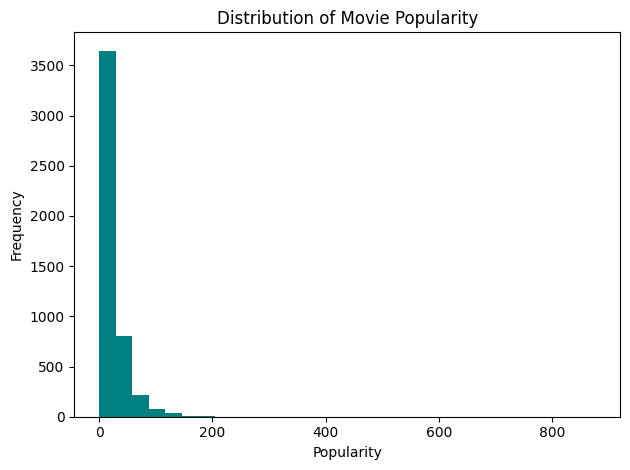

In [ ]:
plt.hist(movies['popularity'], bins=30, color='teal')
plt.title("Distribution of Movie Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Vote Count vs Vote Average (Joint Plot)

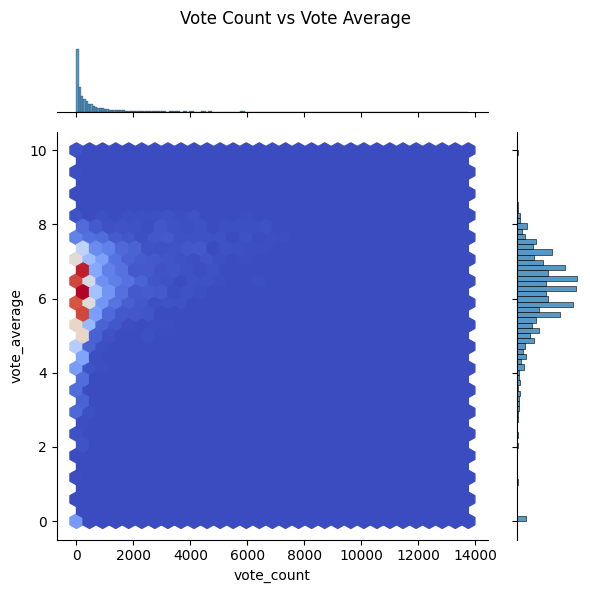

In [ ]:
sns.jointplot(data=movies, x='vote_count', y='vote_average', kind='hex', gridsize=30, cmap='coolwarm')
plt.suptitle("Vote Count vs Vote Average")
plt.tight_layout()
plt.show()


# Monthly Release Trend (Line Plot)

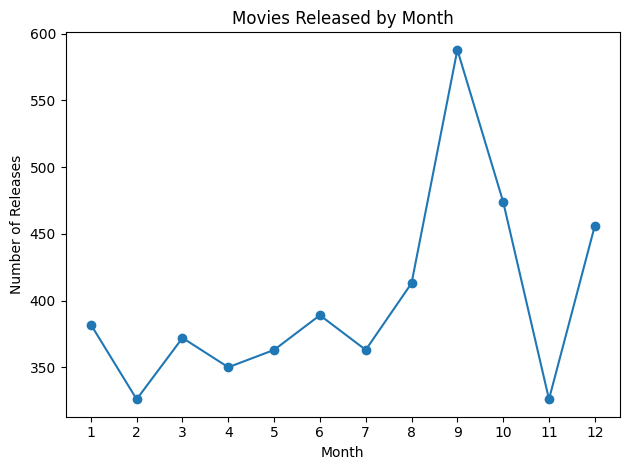

In [ ]:
movies['release_month'] = movies['release_date'].dt.month
monthly_release = movies['release_month'].value_counts().sort_index()
plt.plot(monthly_release.index, monthly_release.values, marker='o')
plt.xticks(ticks=range(1,13))
plt.title("Movies Released by Month")
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.tight_layout()
plt.show()


# Top Keywords (Bar Plot)

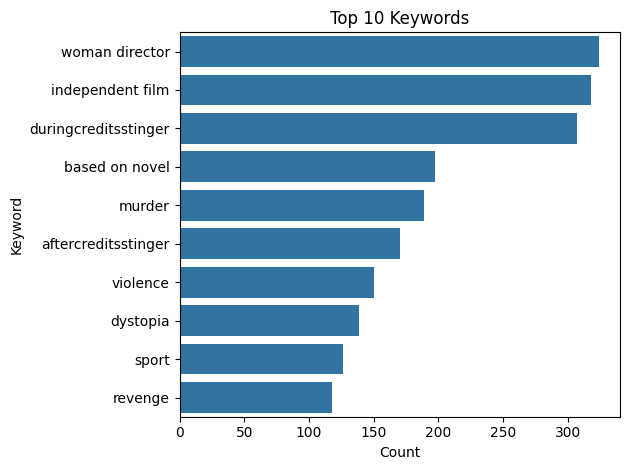

In [ ]:
movies['keywords'] = movies['keywords'].apply(ast.literal_eval)
movies['keyword_list'] = movies['keywords'].apply(lambda x: [d['name'] for d in x])
from itertools import chain
keyword_counter = Counter(chain.from_iterable(movies['keyword_list']))
top_keywords = pd.DataFrame(keyword_counter.most_common(10), columns=['Keyword', 'Count'])

sns.barplot(x='Count', y='Keyword', data=top_keywords)
plt.title("Top 10 Keywords")
plt.tight_layout()
plt.show()


# Revenue by Year (Line Plot)

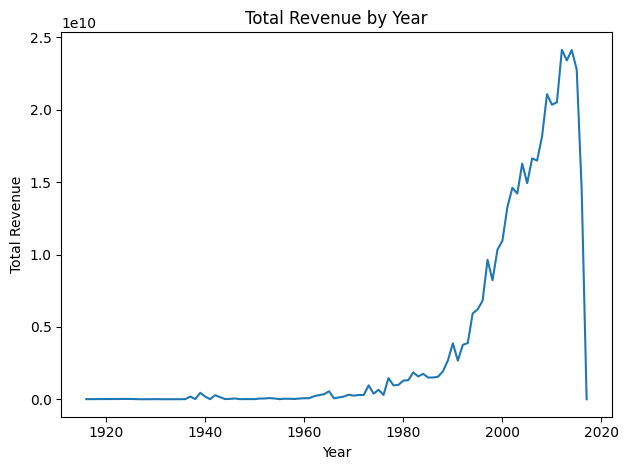

In [ ]:
yearly_revenue = movies.groupby('release_year')['revenue'].sum().dropna()
plt.plot(yearly_revenue.index, yearly_revenue.values)
plt.title("Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


# Budget vs Popularity (Scatter Plot)

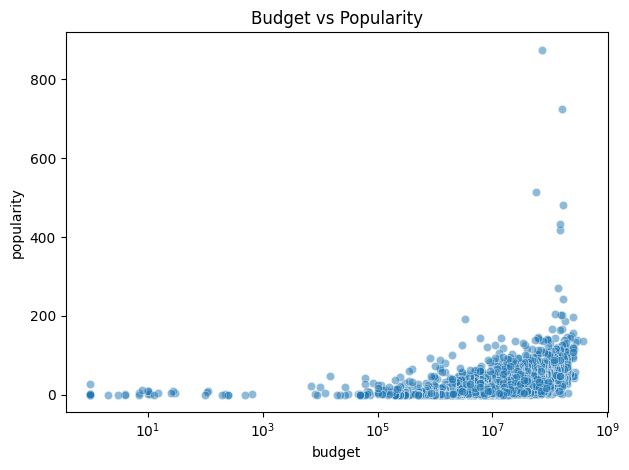

In [ ]:
sns.scatterplot(data=movies, x='budget', y='popularity', alpha=0.5)
plt.title("Budget vs Popularity")
plt.xscale('log')
plt.tight_layout()
plt.show()


# Average Rating per Genre (Box Plot)

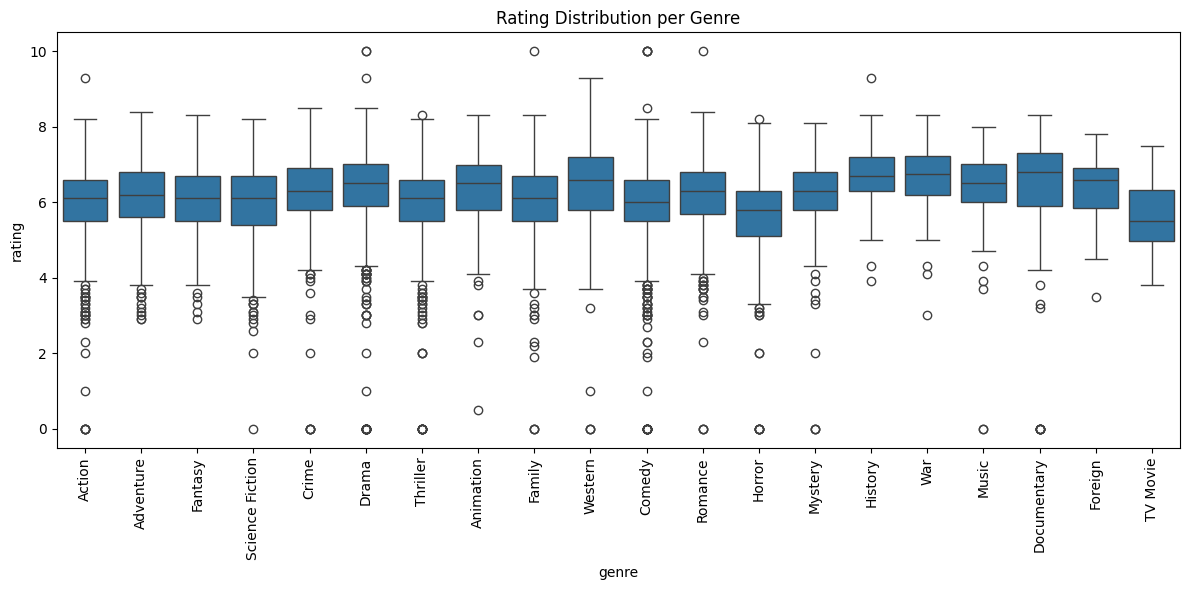

In [ ]:
genre_rating = []
for i, row in movies.iterrows():
    for genre in row['genre_list']:
        genre_rating.append({'genre': genre, 'rating': row['vote_average']})

genre_df = pd.DataFrame(genre_rating)
plt.figure(figsize=(12,6))
sns.boxplot(data=genre_df, x='genre', y='rating')
plt.xticks(rotation=90)
plt.title("Rating Distribution per Genre")
plt.tight_layout()
plt.show()


# Top Production Companies (Bar Plot)

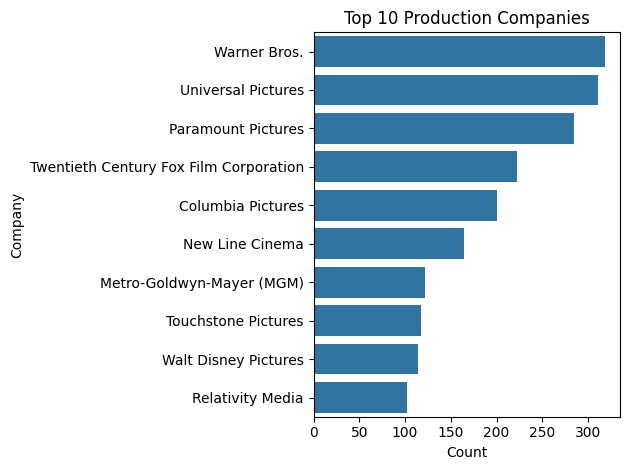

In [ ]:
movies['production_companies'] = movies['production_companies'].apply(ast.literal_eval)
movies['company_list'] = movies['production_companies'].apply(lambda x: [d['name'] for d in x])
company_counter = Counter(chain.from_iterable(movies['company_list']))
top_companies = pd.DataFrame(company_counter.most_common(10), columns=['Company', 'Count'])

sns.barplot(x='Count', y='Company', data=top_companies)
plt.title("Top 10 Production Companies")
plt.tight_layout()
plt.show()
